## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [2]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [3]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path('./Resources/bitstamp.csv'),
    parse_dates= True,
    infer_datetime_format= True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [4]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

Timestamp      Open      High       Low      Close  BTC Volume  \
0  2018-01-01 00:00:00  13681.04  13681.04  13637.93  $13646.48    3.334553   
1  2018-01-01 00:01:00  13646.48  13658.75  13610.18  $13658.75    2.663188   
2  2018-01-01 00:02:00  13616.93  13616.93  13610.06  $13610.22    0.084653   
3  2018-01-01 00:03:00  13610.27  13639.09  13610.27  $13639.09    7.182986   
4  2018-01-01 00:04:00  13635.35  13636.35  13620.00   $13620.0    1.069665   

     USD Volume  Weighted Price  
0  45482.128785    13639.647479  
1  36361.390888    13653.332816  
2   1152.144036    13610.136247  
3  97856.416478    13623.361128  
4  14582.660932    13632.923329

### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [5]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path('./Resources/coinbase.csv'),
    parse_dates= True,
    infer_datetime_format= True
)

In [6]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

Timestamp      Open      High       Low      Close  BTC Volume  \
0  2018-01-01 00:00:00  13620.00  13620.00  13608.49  $13608.49   20.812754   
1  2018-01-01 00:01:00  13607.14  13607.14  13601.66  $13601.66   13.474359   
2  2018-01-01 00:02:00  13601.44  13601.44  13580.00   $13580.0   11.536360   
3  2018-01-01 00:03:00  13587.31  13587.31  13542.70  $13550.34   16.328039   
4  2018-01-01 00:04:00  13550.34  13585.95  13550.34  $13583.44    9.955364   

     USD Volume  Weighted Price  
0  283451.08537    13619.105106  
1  183283.97801    13602.426919  
2  156789.19686    13590.872506  
3  221413.64182    13560.332806  
4  135141.26944    13574.719401

## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [7]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
# Checking for null values first
bitstamp.isnull().sum()
bitstamp = bitstamp.dropna()

In [8]:
#checking null values were dropped
bitstamp.isnull().sum()

Timestamp         0
Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [9]:
# Use the str.replace function to remove the dollar sign, $
# checking first
bitstamp.dtypes
bitstamp.loc[:,'Close'] = bitstamp.loc[:,'Close'].str.replace("$","")

C:\Users\ericr\anaconda3\envs\atmdev\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


### Step 3: Convert the data type of the Close column to a `float`.

In [10]:
# Convert the Close data type to a float
bitstamp.loc[:,'Close'] = bitstamp.loc[:,'Close'].astype('float')
#checking if converted to float
bitstamp.dtypes

Timestamp          object
Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [11]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()
# No Duplicated values

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [12]:
# Repeat Steps 1–4 for the coinbase DataFrame
# checking for null values and dropping them
coinbase.isnull().sum()
coinbase = coinbase.dropna()

In [13]:
# check nulls were dropped
coinbase.isnull().sum()

Timestamp         0
Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [14]:
# checking for dollar signs in close column
coinbase.dtypes
# dropping dollar signs
coinbase.loc[:,'Close'] = coinbase.loc[:,'Close'].str.replace("$","")

C:\Users\ericr\anaconda3\envs\atmdev\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [15]:
#checking dollar signs were removed
coinbase.head()

Timestamp      Open      High       Low     Close  BTC Volume  \
0  2018-01-01 00:00:00  13620.00  13620.00  13608.49  13608.49   20.812754   
1  2018-01-01 00:01:00  13607.14  13607.14  13601.66  13601.66   13.474359   
2  2018-01-01 00:02:00  13601.44  13601.44  13580.00   13580.0   11.536360   
3  2018-01-01 00:03:00  13587.31  13587.31  13542.70  13550.34   16.328039   
4  2018-01-01 00:04:00  13550.34  13585.95  13550.34  13583.44    9.955364   

     USD Volume  Weighted Price  
0  283451.08537    13619.105106  
1  183283.97801    13602.426919  
2  156789.19686    13590.872506  
3  221413.64182    13560.332806  
4  135141.26944    13574.719401

In [16]:
#Changing Close column to float
coinbase.loc[:,'Close'] = coinbase.loc[:,'Close'].astype('float')
coinbase.dtypes

Timestamp          object
Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [17]:
# checking for duplicates
coinbase.duplicated()
# no duplicates

0         False
1         False
2         False
3         False
4         False
          ...  
129535    False
129536    False
129537    False
129538    False
129539    False
Length: 129322, dtype: bool

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [18]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.set_index('Timestamp')
bitstamp_sliced = bitstamp_sliced.loc[:,'Close']
# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [19]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.set_index('Timestamp')
coinbase_sliced = coinbase_sliced.loc[:,'Close']
# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [20]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [21]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp prices'}, xlabel='Timestamp'>

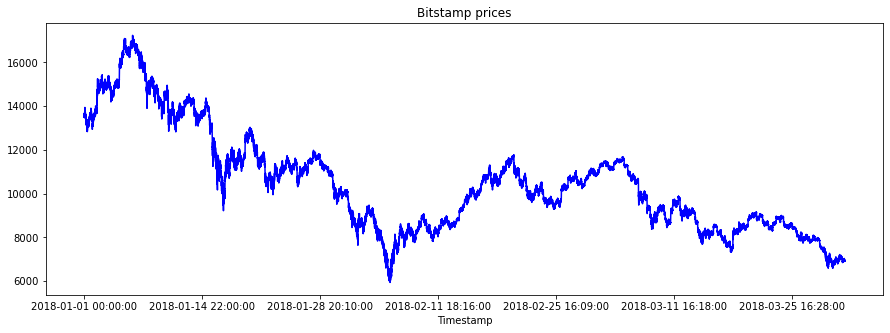

In [22]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(title = 'Bitstamp prices', figsize = (15,5), color = 'blue')

<AxesSubplot:title={'center':'Coinbase Prices'}, xlabel='Timestamp'>

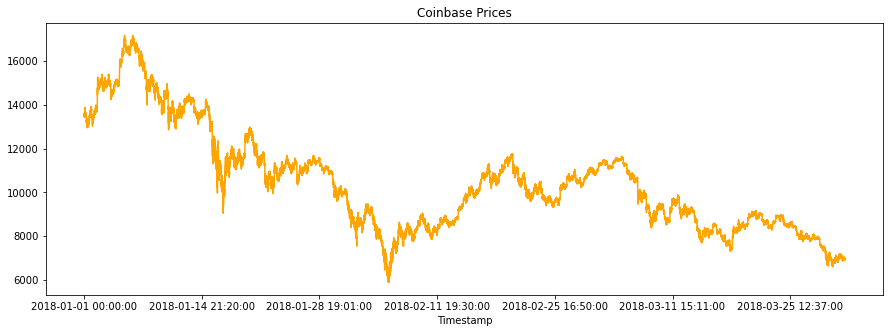

In [23]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(title = 'Coinbase Prices', figsize = (15,5), color = 'orange')

<AxesSubplot:title={'center':'Bitstamp vs Coinbase prices'}, xlabel='Timestamp'>

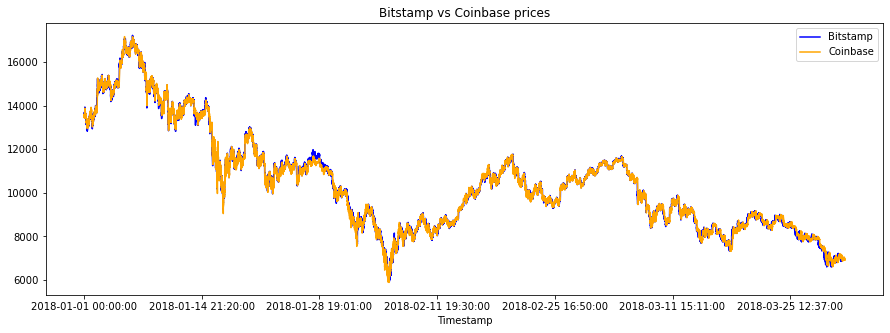

In [24]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.plot(legend = True, title = 'Bitstamp vs Coinbase prices', figsize = (15,7), color = 'blue', label = 'Bitstamp')
coinbase_sliced.plot(legend = True, figsize = (15,5), color = 'orange', label = 'Coinbase')

<AxesSubplot:title={'center':'Bitstamp vs Coinbase prices'}, xlabel='Timestamp'>

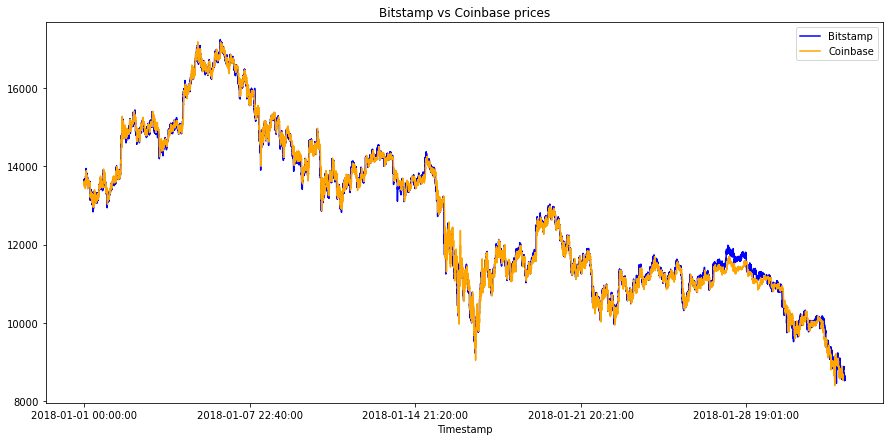

In [25]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.loc['2018-01-01 00:00:00' : '2018-02-01-01 00:00:00'].plot(legend = True, title = 'Bitstamp vs Coinbase prices', figsize = (15,7), color = 'blue', label = 'Bitstamp')
coinbase_sliced.loc['2018-01-01 00:00:00' : '2018-02-01-01 00:00:00'].plot(legend = True, figsize = (15,7), color = 'orange', label = 'Coinbase')

<AxesSubplot:title={'center':'Bitstamp vs Coinbase prices'}, xlabel='Timestamp'>

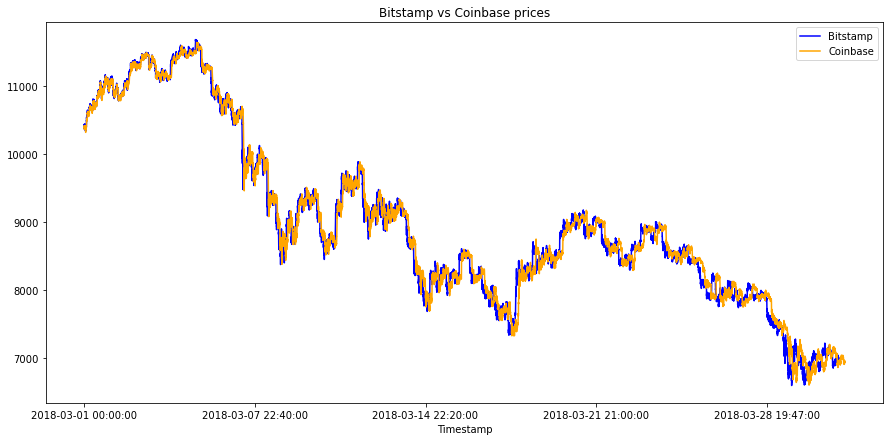

In [26]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced.loc['2018-03-01 00:00:00' : '2018-03-31-01 00:00:00'].plot(legend = True, title = 'Bitstamp vs Coinbase prices', figsize = (15,7), color = 'blue', label = 'Bitstamp')
coinbase_sliced.loc['2018-03-01 00:00:00' : '2018-03-31-01 00:00:00'].plot(legend = True, figsize = (15,7), color = 'orange', label = 'Coinbase')

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Yes, there is more spread in March 2018

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitstamp vs Coinbase prices 1/27/2018'}, xlabel='Timestamp'>

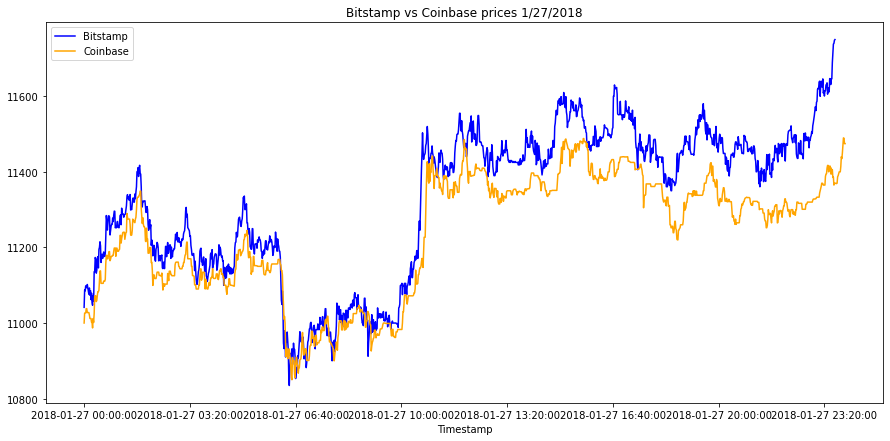

In [27]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018-01-27 00:00:00' : '2018-01-27 23:59:00'].plot(legend = True, title = 'Bitstamp vs Coinbase prices 1/27/2018', figsize = (15,7), color = 'blue', label = 'Bitstamp')
coinbase_sliced.loc['2018-01-27 00:00:00' : '2018-01-27 23:59:00'].plot(legend = True, figsize = (15,7), color = 'orange', label = 'Coinbase')

In [28]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp_sliced.loc['2018-01-27 00:00:00' : '2018-01-27 23:59:00'] - coinbase_sliced.loc['2018-01-27 00:00:00' : '2018-01-27 23:59:00']

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1421.000000
mean       84.558600
std        51.823073
min       -35.950000
25%        47.430000
50%        75.940000
75%       116.180000
max       275.380000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbritrage Spread 1/27/2018'}>

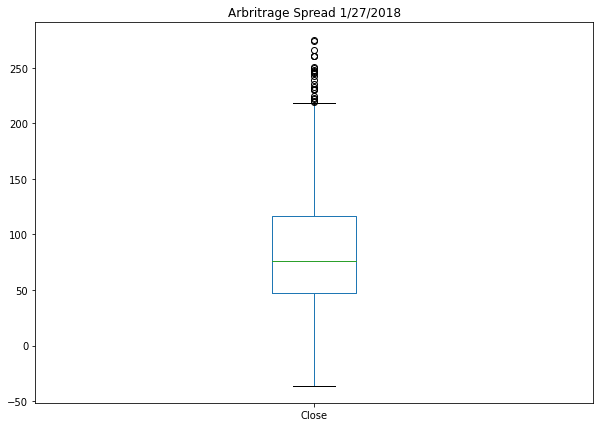

In [29]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind = 'box', title = 'Arbritrage Spread 1/27/2018',figsize= (10,7))

<AxesSubplot:title={'center':'Bitstamp vs Coinbase prices 2/25/2018'}, xlabel='Timestamp'>

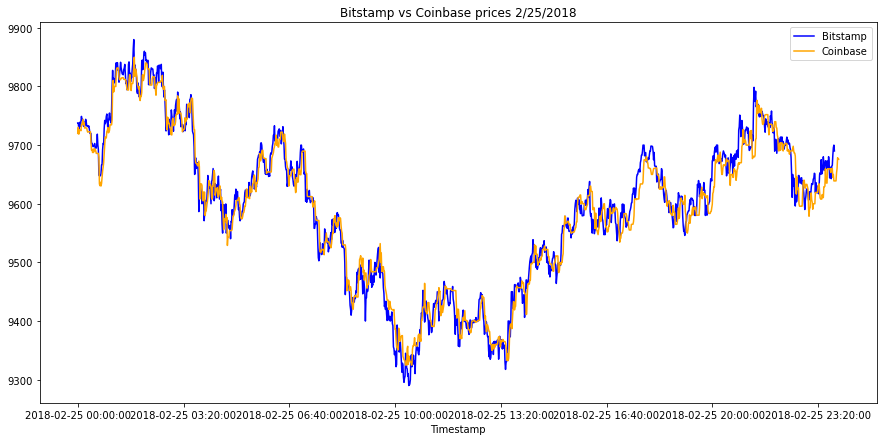

In [30]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018-02-25 00:00:00' : '2018-02-25 23:59:00'].plot(legend = True, title = 'Bitstamp vs Coinbase prices 2/25/2018', figsize = (15,7), color = 'blue', label = 'Bitstamp')
coinbase_sliced.loc['2018-02-25 00:00:00' : '2018-02-25 23:59:00'].plot(legend = True, figsize = (15,7), color = 'orange', label = 'Coinbase')

In [31]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp_sliced.loc['2018-02-25 00:00:00' : '2018-02-25 23:59:00'] - coinbase_sliced.loc['2018-02-25 00:00:00' : '2018-02-25 23:59:00']

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1432.000000
mean        2.994050
std        12.592215
min       -56.050000
25%        -4.652500
50%         3.335000
75%        11.375000
max        39.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread 2/25/2018'}>

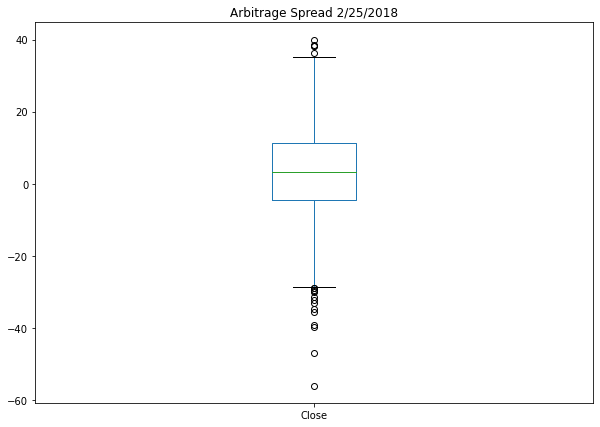

In [32]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind = 'box', title = 'Arbitrage Spread 2/25/2018', figsize = (10,7))

<AxesSubplot:title={'center':'Bitstamp vs Coinbase prices 3/25/2018'}, xlabel='Timestamp'>

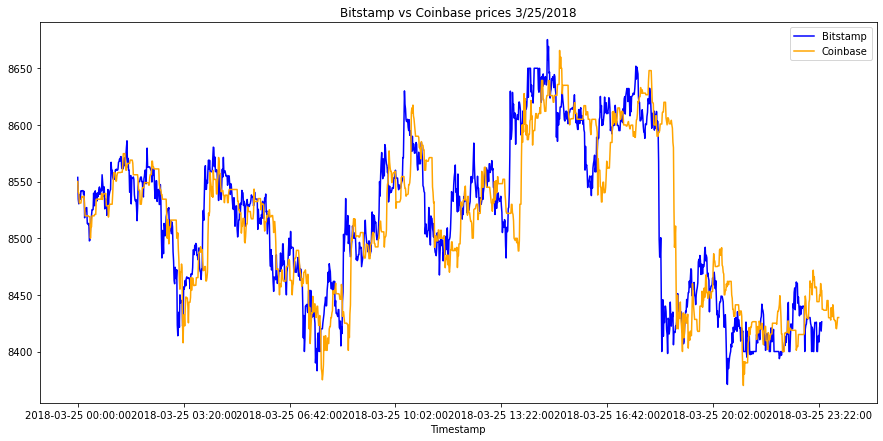

In [33]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018-03-25 00:00:00' : '2018-03-25 23:59:00'].plot(legend = True, title = 'Bitstamp vs Coinbase prices 3/25/2018', figsize = (15,7), color = 'blue', label = 'Bitstamp')
coinbase_sliced.loc['2018-03-25 00:00:00' : '2018-03-25 23:59:00'].plot(legend = True, figsize = (15,7), color = 'orange', label = 'Coinbase')

In [34]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp_sliced.loc['2018-03-25 00:00:00' : '2018-03-25 23:59:00'] - coinbase_sliced.loc['2018-03-25 00:00:00' : '2018-03-25 23:59:00']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1404.000000
mean        2.294423
std         9.853020
min       -53.940000
25%        -3.767500
50%         2.805000
75%         8.810000
max        34.640000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbritrage Spread'}>

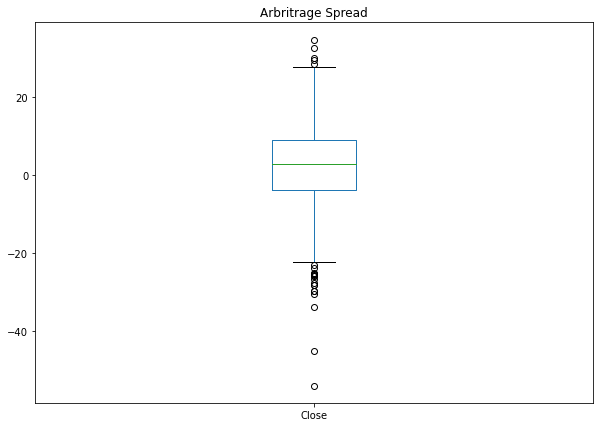

In [35]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(title = 'Arbritrage Spread', kind = 'box', figsize = (10,7))

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [36]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
"""this was done already"""

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early[arbitrage_spread_early > 0].describe()


count    1396.000000
mean       86.261082
std        50.670518
min         0.180000
25%        49.407500
50%        76.850000
75%       117.845000
max       275.380000
Name: Close, dtype: float64

In [37]:
arbitrage_spread_middle[arbitrage_spread_middle > 0].describe()

count    886.000000
mean      10.697788
std        7.695810
min        0.010000
25%        4.575000
50%        9.465000
75%       15.452500
max       39.990000
Name: Close, dtype: float64

In [38]:
arbitrage_spread_late[arbitrage_spread_late > 0].describe()

count    862.000000
mean       8.345858
std        5.854515
min        0.030000
25%        3.857500
50%        7.325000
75%       11.870000
max       34.640000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [39]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = arbitrage_spread_early[arbitrage_spread_early > 0] / coinbase_sliced.loc['2018-01-27 00:00:00' : '2018-01-27 23:59:00']

# Review the spread return DataFrame
spread_return_early.head()

Timestamp
2018-01-27 00:00:00    0.003774
2018-01-27 00:01:00    0.005542
2018-01-27 00:02:00    0.005324
2018-01-27 00:03:00    0.006529
2018-01-27 00:04:00    0.005314
Name: Close, dtype: float64

In [40]:
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0] / coinbase_sliced.loc['2018-02-25 00:00:00' : '2018-02-25 23:59:00']

spread_return_middle.head()

Timestamp
2018-02-25 00:00:00    0.001829
2018-02-25 00:01:00    0.000778
2018-02-25 00:02:00    0.000913
2018-02-25 00:03:00    0.000331
2018-02-25 00:04:00    0.001335
Name: Close, dtype: float64

In [41]:
spread_return_late = arbitrage_spread_late[arbitrage_spread_late > 0] / coinbase_sliced.loc['2018-03-25 00:00:00' : '2018-03-25 23:59:00']

spread_return_late.head()

Timestamp
2018-03-25 00:00:00    0.000429
2018-03-25 00:01:00         NaN
2018-03-25 00:02:00         NaN
2018-03-25 00:03:00    0.000880
2018-03-25 00:04:00    0.000394
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [50]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > 0.01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-27 00:19:00    0.010039
2018-01-27 03:12:00    0.010372
2018-01-27 12:16:00    0.010346
2018-01-27 12:17:00    0.010271
2018-01-27 12:18:00    0.011292
Name: Close, dtype: float64

In [56]:
profitable_trades_middle = spread_return_middle[spread_return_middle > 0.01]
profitable_trades_middle.head()
"""no profitable trades for 2/25"""

Series([], Name: Close, dtype: float64)

In [49]:
profitable_trades_late = spread_return_late[spread_return_late > 0.01]
profitable_trades_late.head()
"""no profitable trades for 3/25"""

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [44]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
"""only profitable trades for 1/27"""

profitable_trades_early.describe()

count    382.000000
mean       0.013429
std        0.002947
min        0.010006
25%        0.011299
50%        0.012674
75%        0.014792
max        0.023999
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [71]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * coinbase_sliced.loc['2018-01-27 00:00:00' : '2018-01-27 23:59:00']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early.head(10)

Timestamp
2018-01-27 00:19:00    110.68
2018-01-27 03:12:00    115.97
2018-01-27 12:16:00    117.84
2018-01-27 12:17:00    117.00
2018-01-27 12:18:00    128.63
2018-01-27 12:19:00    130.01
2018-01-27 12:21:00    127.13
2018-01-27 12:24:00    116.17
2018-01-27 12:25:00    124.61
2018-01-27 12:33:00    115.30
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [61]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count    382.000000
mean     152.383927
std       33.701052
min      110.680000
25%      128.072500
50%      143.640000
75%      168.005000
max      275.380000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'profit per trade ($) 1/27/2018'}, xlabel='Timestamp'>

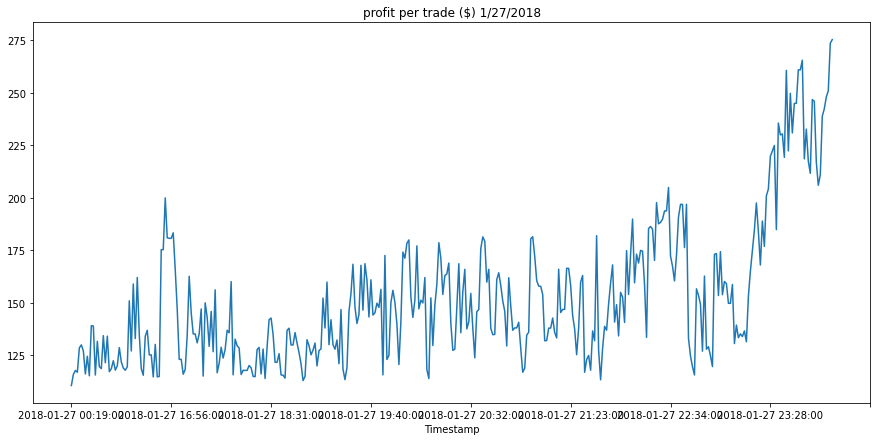

In [66]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(title = 'profit per trade ($) 1/27/2018', figsize=(15,7))

(#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [67]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_sum = profit_per_trade_early.sum()
profit_sum

58210.65999999999

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [69]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_early

Timestamp
2018-01-27 00:19:00      110.68
2018-01-27 03:12:00      226.65
2018-01-27 12:16:00      344.49
2018-01-27 12:17:00      461.49
2018-01-27 12:18:00      590.12
                         ...   
2018-01-27 23:55:00    57162.60
2018-01-27 23:56:00    57410.60
2018-01-27 23:57:00    57661.60
2018-01-27 23:58:00    57935.28
2018-01-27 23:59:00    58210.66
Name: Close, Length: 382, dtype: float64

<AxesSubplot:title={'center':'Cumulative Sum of Profits ($) 1/27/2018'}, xlabel='Timestamp'>

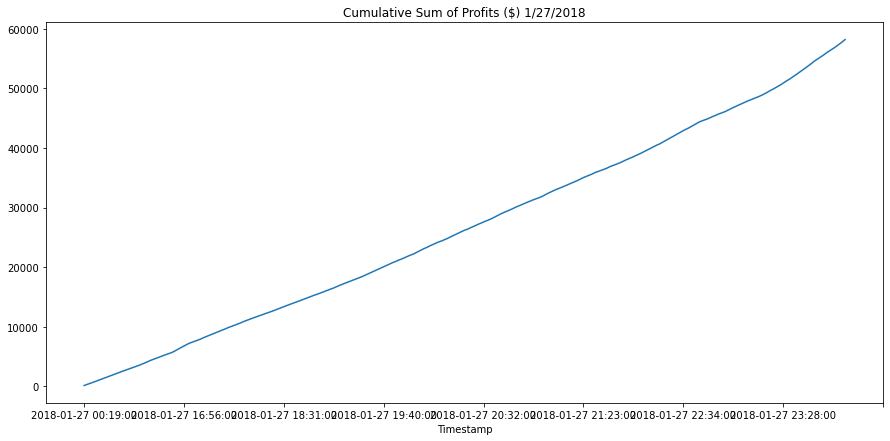

In [70]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(title = 'Cumulative Sum of Profits ($) 1/27/2018', figsize = (15,7))

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** 1/27/2018 (early date) was the only profitable day for arbitrage out of the 3 days.  1/27/2018 was one of the most profitable days with the potential to earn $58,210.66.  The trend appears to be that the spread was tighter as we moved into February and March 2018.  There weren't any profitable trades on those dates to cover the 1% transaction cost